##Syed Aali

Task 3 - Oasis Infobyte - Car Price Prediction with Machine Learning

Importing all the necessary things required

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [47]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
df.shape

(205, 26)

In [49]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [53]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [54]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [55]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##Cleaning the data as needed.

In [56]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [57]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [58]:
df['CarBrand']  = df['CarName'].apply(lambda x : x.split()[0])
df.drop('CarName',axis = 1, inplace= True)

In [59]:
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Since I can notice some names being incorrect, we should fix them just for better clarity

In [60]:
df['CarBrand'] = df['CarBrand'].replace('vw', 'volkswagen')
df['CarBrand'] = df['CarBrand'].replace('maxda','mazda')
df['CarBrand'] = df['CarBrand'].replace('Nissan','nissan')
df['CarBrand'] = df['CarBrand'].replace('porcshce','porsche')
df['CarBrand'] = df['CarBrand'].replace('toyouta','toyota')
df['CarBrand'] = df['CarBrand'].replace('vokswagen','volkswagen')

In [61]:
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [62]:
df.head(10)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [63]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarBrand'],
      dtype='object')

Plotting a heatmap for the data

<ipython-input-64-04e0461d7796>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

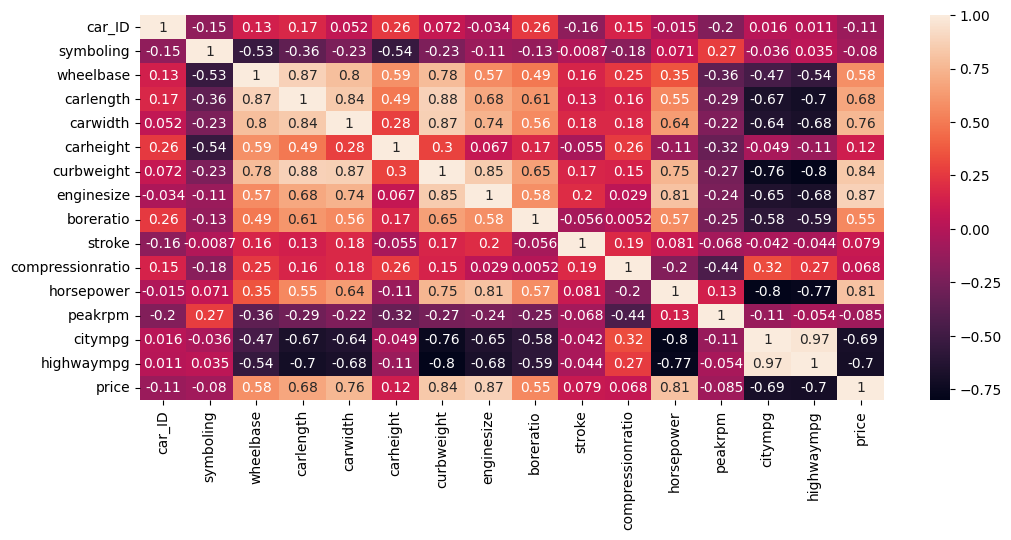

In [64]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(),annot = True)

Visualizing the data for better understanding



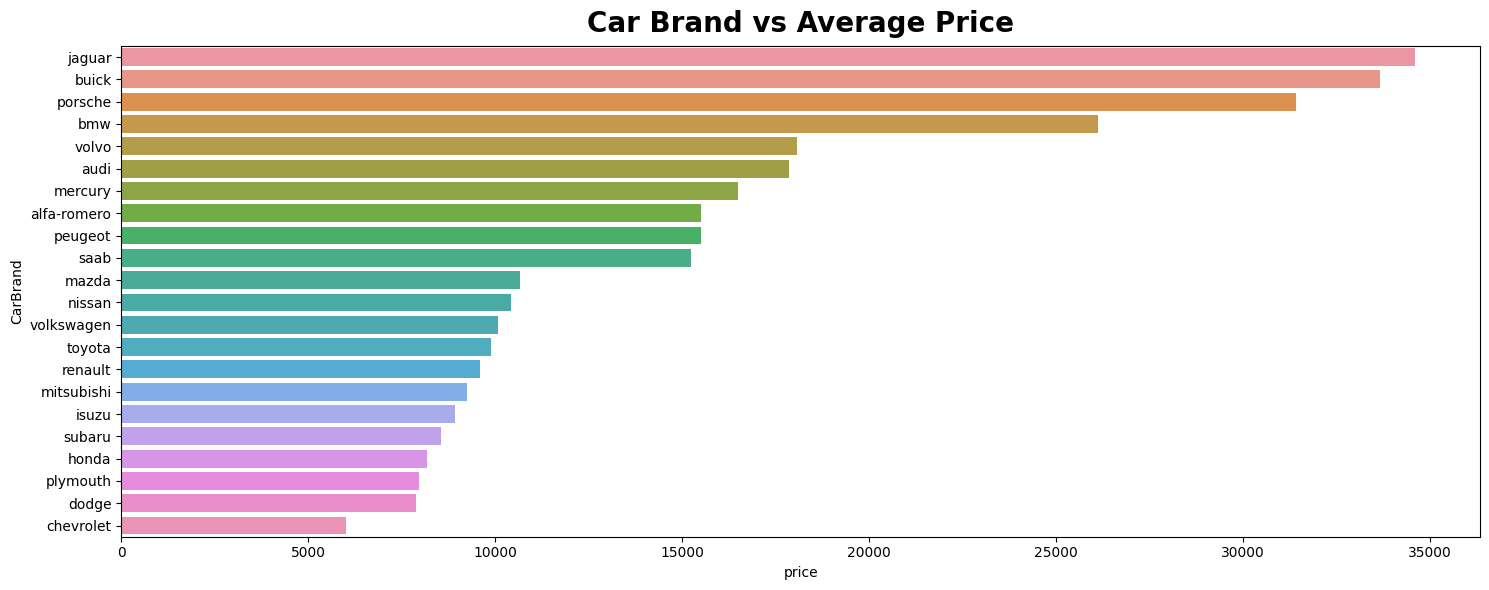

In [65]:
plt.figure(figsize=(15, 6))
x = pd.DataFrame(df.groupby("CarBrand")["price"].mean().sort_values(ascending=False))
sns.barplot(x="price", y=x.index, data=x)
plt.xticks(rotation=0)
plt.title("Car Brand vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

This graph shows that some brands have a higher average price such as "Jaguar"

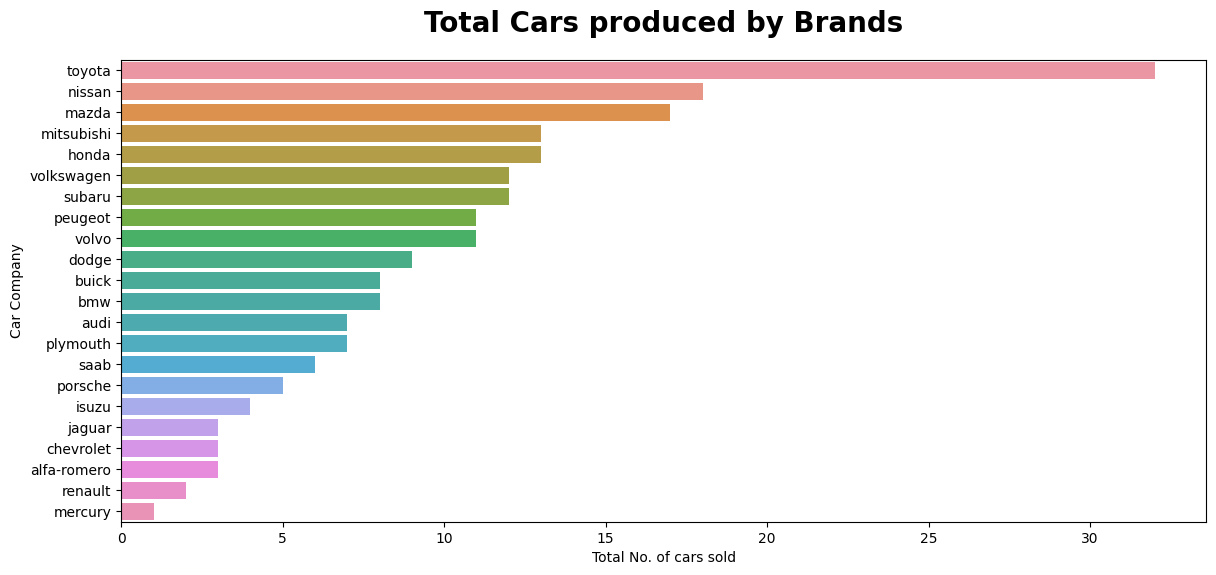

In [66]:
plt.figure(figsize=(14, 6))
counts = df["CarBrand"].value_counts()
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel("Total No. of cars sold")
plt.ylabel("Car Company")
plt.title("Total Cars sold by Brands", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=0)
plt.show()

This shows the specific amount of cars sold by brands with "Toyota" being the most highest

<ipython-input-67-9a383e71d147>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],color="green",kde=True)


Text(0.5, 1.0, 'Car Price Distribution')

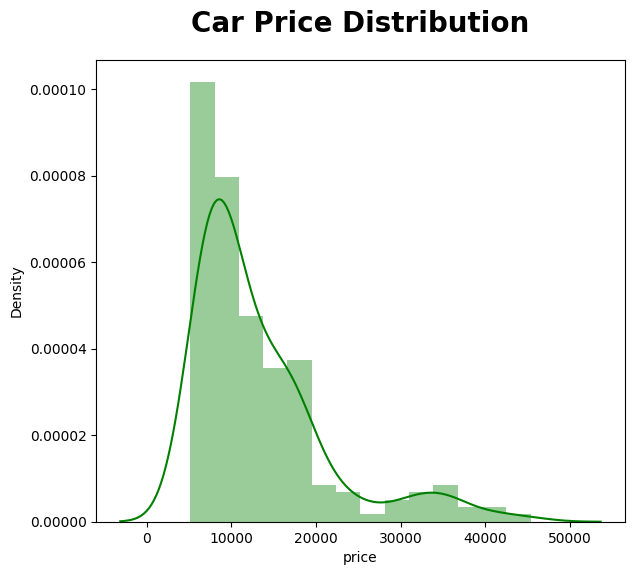

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="green",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

This aims to show the distribution of prices in our dataset with most cars averaging near the 10k to 20k mark.

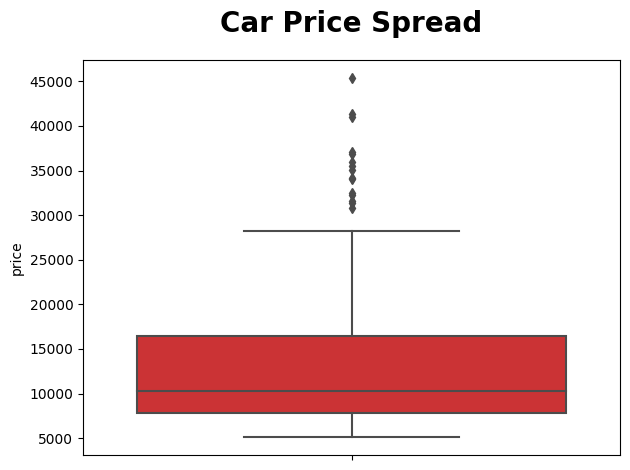

In [68]:
sns.boxplot(y=df["price"], palette="Set1")
plt.title("Car Price Spread", fontweight="black", pad=20, fontsize=20)
plt.tight_layout()
plt.show()

This further proves the point that most cars hover around 10k to 15k with a few exceptions (outliers) with higher prices in the dataset.

Seperating the features in the dataset to Numerical and Categorical.



In [70]:
numericalfeature = []
for i in df.columns:
    if df[i].dtypes != object:
        numericalfeature.append(i)
numericalfeature

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [71]:
categoricalfeature = []
for i in df.columns:
    if df[i].dtypes == object:
        categoricalfeature.append(i)
categoricalfeature


['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarBrand']

<ipython-input-72-03c981ea02da>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


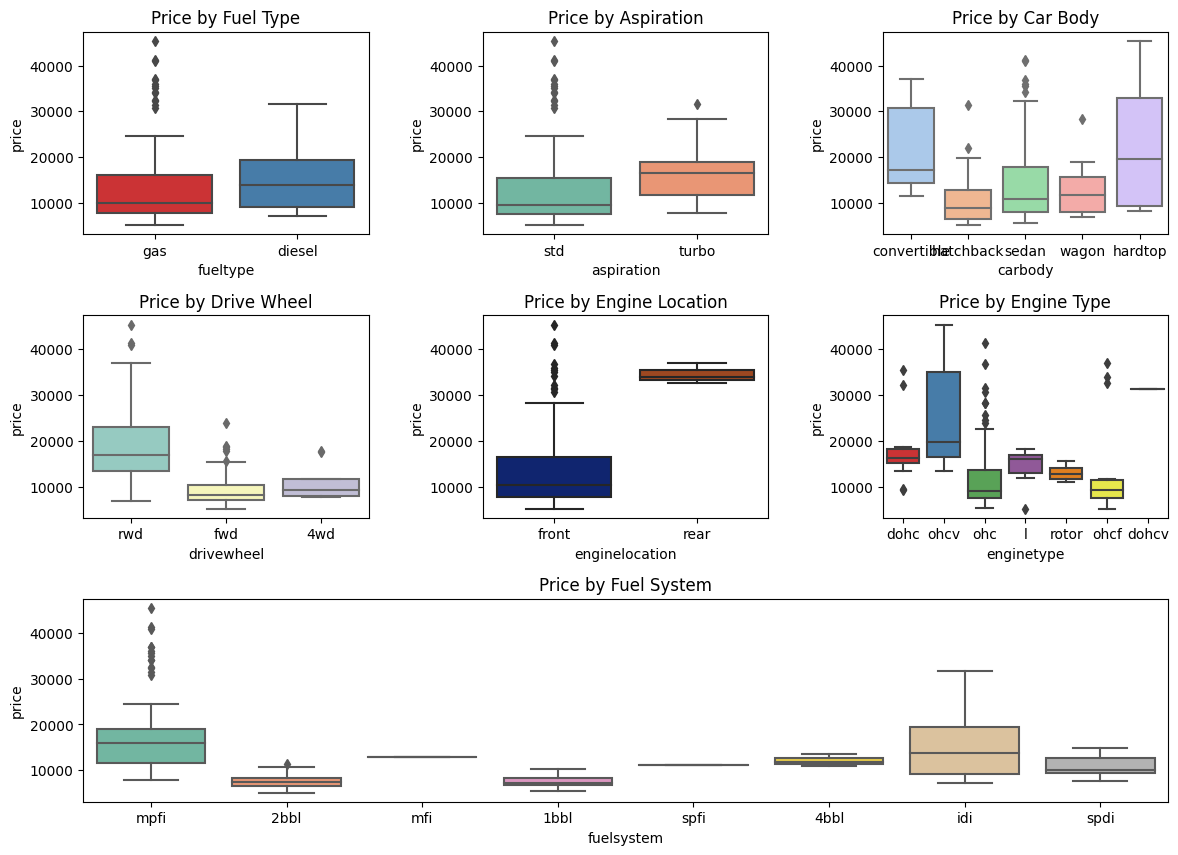

In [72]:
plt.figure(figsize=(14, 10))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.4)

ax1 = plt.subplot(grid[0, 0])
sns.boxplot(x='fueltype', y='price', data=df, palette='Set1')
ax1.set_title("Price by Fuel Type")

ax2 = plt.subplot(grid[0, 1])
sns.boxplot(x='aspiration', y='price', data=df, palette='Set2')
ax2.set_title("Price by Aspiration")

ax3 = plt.subplot(grid[0, 2])
sns.boxplot(x='carbody', y='price', data=df, palette='pastel')
ax3.set_title("Price by Car Body")

ax4 = plt.subplot(grid[1, 0])
sns.boxplot(x='drivewheel', y='price', data=df, palette='Set3')
ax4.set_title("Price by Drive Wheel")

ax5 = plt.subplot(grid[1, 1])
sns.boxplot(x='enginelocation', y='price', data=df, palette='dark')
ax5.set_title("Price by Engine Location")

ax6 = plt.subplot(grid[1, 2])
sns.boxplot(x='enginetype', y='price', data=df, palette='Set1')
ax6.set_title("Price by Engine Type")

ax7 = plt.subplot(grid[2, :])
sns.boxplot(x='fuelsystem', y='price', data=df, palette='Set2')
ax7.set_title("Price by Fuel System")


plt.tight_layout()
plt.show()

<Axes: xlabel='CarBrand', ylabel='price'>

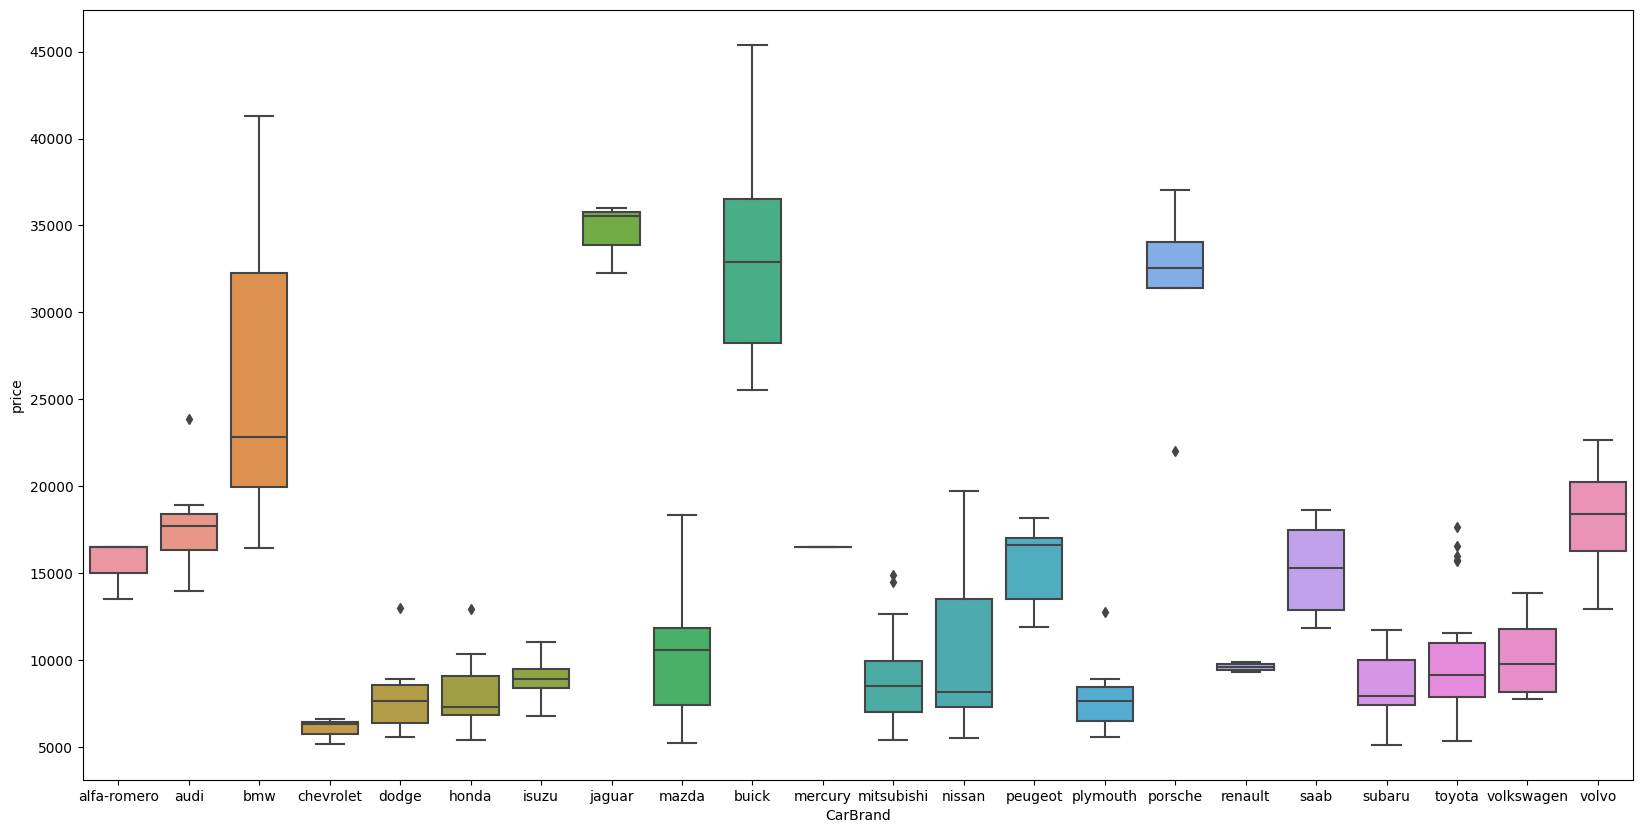

In [73]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='CarBrand', y='price', data=df)

This shows the supposed outliers in the data but to remove and cater to such outliers you'd need to have domain knowledge to letting them be.

Preparing the data to train a model on it.

In [74]:
columns_to_keep = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype','cylindernumber', 'fuelsystem', 'wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
df1 = df[columns_to_keep]
df1.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [75]:
numericalfeature1 = []
for i in df1.columns:
    if df1[i].dtypes != object:
        numericalfeature1.append(i)
numericalfeature1

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [76]:
categoricalfeature1 = []
for i in df1.columns:
    if df1[i].dtypes == object:
        categoricalfeature1.append(i)
categoricalfeature1


['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [77]:
df1 = pd.get_dummies(columns=categoricalfeature1,data=df1)
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
scaler = StandardScaler()

In [79]:
df1[numericalfeature1] = scaler.fit_transform(df1[numericalfeature1])
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,...,0,0,0,0,0,0,0,1,0,0


In [80]:
x = df1.drop(columns=["price"])
y = df1["price"]

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred = model.predict(x_train)
error_square = metrics.r2_score(y_train, y_pred)
print("Error square for Linear Regression: ", error_square)

Error square for Linear Regression:  0.9252761715043437


In [84]:
y_pred = model.predict(x_test)
score=mse(y_test,y_pred)
print(f"Mean squared error for Linear Regression is {score}")


Mean squared error for Linear Regression is 0.14086539689514835


In [85]:
score1=model.score(x_test,y_test)
print(f"Accuracy for LinearRegression is {(score1*100).__round__(2)}%")

Accuracy for LinearRegression is 88.67%


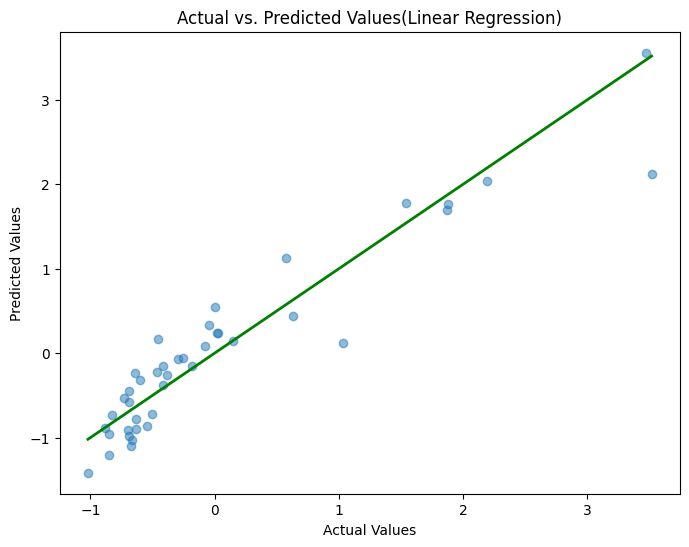

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values(Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='green', linewidth=2)
plt.show()

It can be seen that the Linear Regression Model is fairly accurate with a Low MSE and a decent accuracy at 88.67 but we can still see some instances where there are some issues that might possibly be fixed with the removal of outliers.


In [87]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)


DecisionTreeRegressor()

In [88]:
y_pred1 = model2.predict(x_train)
error_square = metrics.r2_score(y_train, y_pred1)
print("Error square for Decision Tree Regressor: ", error_square)

Error square for Decision Tree Regressor:  0.9986537119069865


In [89]:
y_pred1 = model2.predict(x_test)
score=mse(y_test,y_pred1)
print(f"Mean squared error for Decision Tree Regressor is {score}")

Mean squared error for Decision Tree Regressor is 0.1223944603889159


In [90]:
model2.fit(x_train, y_train)
score2=model2.score(x_train, y_train)
print(f"Accuracy for Decision Tree Regressor is {(score2*100).__round__(2)}%")


Accuracy for Decision Tree Regressor is 99.87%


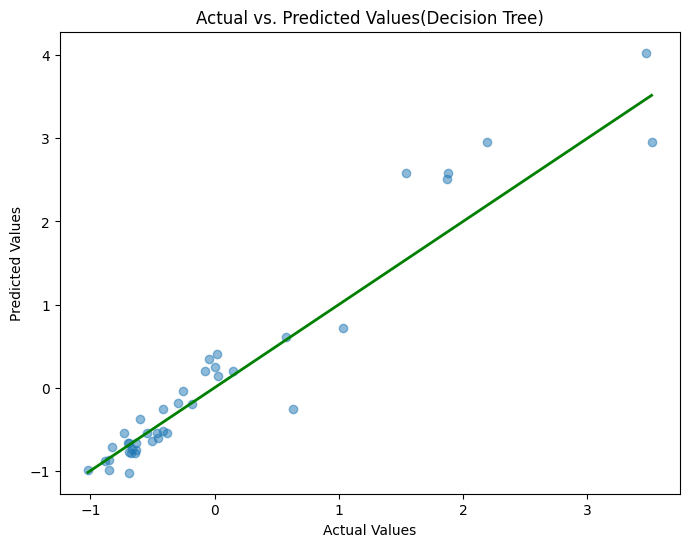

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values(Decision Tree)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='green', linewidth=2)
plt.show()

Even though the Decision Tree algorithm has a much higher accuracy rate and lower MSE it does boast a higher SE rate which indicates incorrect predictions for some instances. That being said the Decision Tree algorithm provides better predictions.


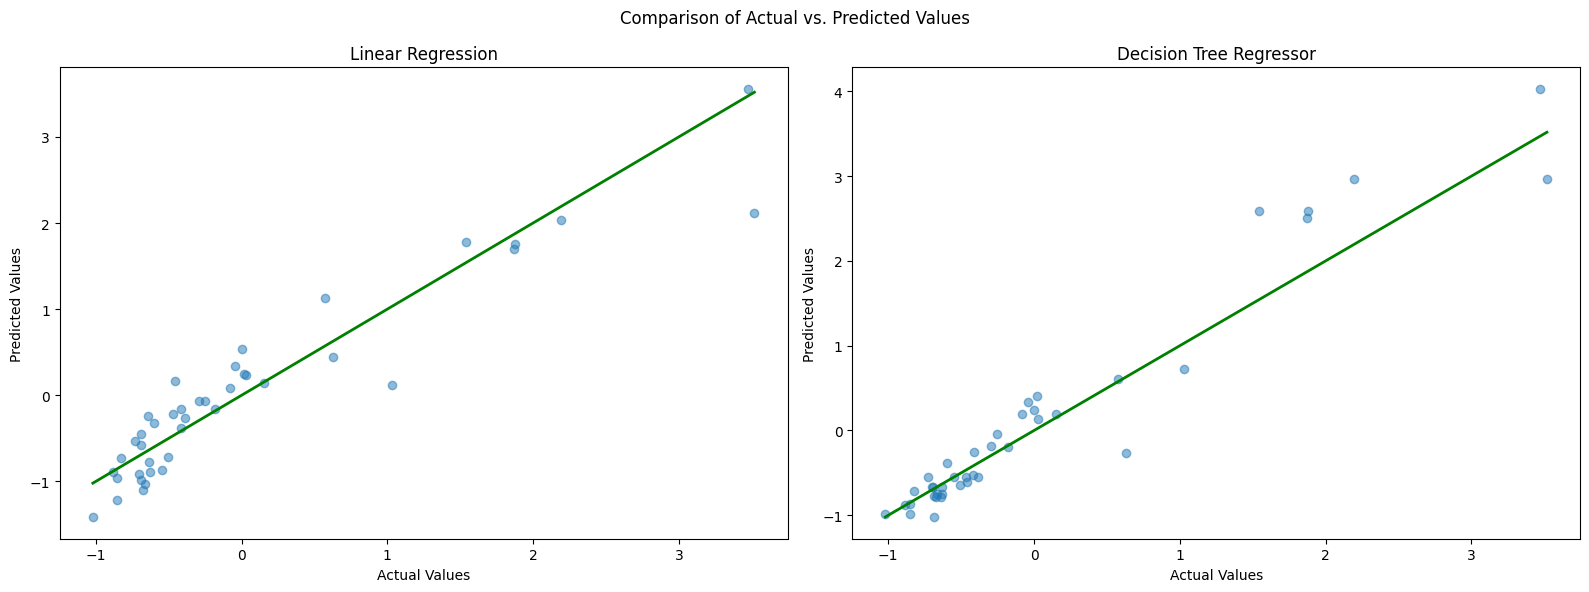

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Linear Regression)
axs[0].scatter(y_test, y_pred, alpha=0.5)
axs[0].set_xlabel("Actual Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Linear Regression")
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='green', linewidth=2)

# Second subplot (Decision Tree Regressor)
axs[1].scatter(y_test, y_pred1, alpha=0.5)
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")
axs[1].set_title("Decision Tree Regressor")
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='green', linewidth=2)

fig.suptitle("Comparison of Actual vs. Predicted Values")
plt.tight_layout()
plt.show()


This graph shows a comparision between the two models I applied to the dataset to further emphasise the differece in between their predictions and actual data.